# PES University, Bangalore
Established under Karnataka Act No. 16 of 2013

UE20CS312 - Data Analytics - Worksheet 5
Course instructor: Gowri Srinivasa, Professor Dept. of CSE, PES University

## Name: Ishita Bharadwaj <BR>
## SRN : PES1UG20CS648
### Collaborated with Hita (645) and Jeffrey (651)

# Markov Chains and AB Testing

# Scenario 2

Its a freezing day in New york, Commisioner Wench has sent a report to Captain Holt that the 99th precinct has much lower reported crimes compared to other precincts. Upon Analysis Captain Holt decides to add feedback unit along with the 4 major units to analyse this descripency. All the units are mentioned below

1.   Major Crimes
2.   Traffic
3.   General crimes
4.   Feedback
5.   Theft

---
---
<br>

The initial probablity of a person going to a particular unit on a particular day is given as follows


<br>

Major Crimes | Traffic | General crimes | Feedback | Theft
:----------: | :-----: | :------------: | :--------: | :---:
0.3 | 0.4 | 0.1 | 0.15 | 0.05 
<br>


To measure how many people will go to the feedback unit, the personel files of all employees are give to the **_Move-o-Tron 99_** and it gives us the following matrix which shows us the probability of people moving from one unit to another on a particular day . It is known that the **_Move-o-Tron 99_** alwasy outputs matices which follow a first order Markov chain. 

| |Major Crimes|Traffic|General crimes|Feedback|Theft|
|---|---|---|---|---|---|
|Major Crimes|0\.002|0\.666|0\.31|0\.0|0\.022|
|Traffic|0\.466|0\.102|0\.222|0\.0|0\.21|
|General crimes|0\.022|0\.11|0\.502|0\.0|0\.366|
|Feedback|0\.0|0\.0|0\.0|1\.0|0\.0|
|Theft|0\.11|0\.122|0\.066|0\.0|0\.702|

As the people of New York are smart the will learn where all the units are present and hence the next days (day 1) distribution will be the distribution present at the end of the current day (day 0). Captain holt want to check if the matrix given by the **_Move-o-Tron_** can be used to model the footfall.



## Problem 1 (2 points)

1. What technique can be used to model the probability of people going to the correct unit to report thier crime after N days? (0 points)
2. Is the chain irreducible? Justify (0.5 point)
3. What will be the intital probability of a person going to a particular unit after 1 day, 2 days, 10 days, 1000 days and 1001 days. (1 point)
 
 Hint: Use the  Chapman−Kolmogorov relationship

     ```python
    # C = A.B
    matrix_C = np.dot(matrix_A, matrix_B)

    # C = A.(B^4) can be replaced by
    matrix_C = matrix_A
    for _ in range(4):
        matrix_C = np.dot(matrix_C, matrix_B)
    ```

4. What can you say about the markov chain from state of intital probability of a person going to a particular unit after 1000 and 1001 days? (0.5 points)

In [1]:
# Importing Libraries
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
# encoding the probabilities as a numpy array
trans_array = np.array([
    [0.002, 0.666, 0.31, 0, 0.022],
    [0.466, 0.102, 0.222, 0, 0.21],
    [0.022, 0.11, 0.502, 0, 0.366],
    [0, 0, 0, 1, 0],
    [0.11, 0.122, 0.066, 0, 0.702]
])
# ensures that the probabilities sum to 1
assert(trans_array[0].sum() == 1.0)
assert(trans_array[1].sum() == 1.0)
assert(trans_array[2].sum() == 1.0)
assert(trans_array[3].sum() == 1.0)
assert(trans_array[4].sum() == 1.0)



# encoding the initial probability of as a numpy array
state = np.array([[0.3, 0.4, 0.1, 0.15, 0.05]])
assert(state[0].sum() == 1.0)

# C = A.B
# matrix_C = np.dot(state, trans_array)
 # C = A.(B^4) can be replaced by
 
matrix_C = state
for _ in range(1):
    matrix_C = np.dot(matrix_C, trans_array)

print("intital probability of a person going to a particular unit after 1 day: ", matrix_C)

matrix_C = state
for _ in range(2):
    matrix_C = np.dot(matrix_C, trans_array)

print("intital probability of a person going to a particular unit after 2 day: ", matrix_C)

matrix_C = state
for _ in range(10):
    matrix_C = np.dot(matrix_C, trans_array)

print("intital probability of a person going to a particular unit after 10 day: ", matrix_C)

matrix_C = state
for _ in range(100):
    matrix_C = np.dot(matrix_C, trans_array)

print("intital probability of a person going to a particular unit after 100 day: ", matrix_C)

matrix_C = state
for _ in range(1000):
    matrix_C = np.dot(matrix_C, trans_array)

print("intital probability of a person going to a particular unit after 1000 day: ", matrix_C)


matrix_C = state
for _ in range(1001):
    matrix_C = np.dot(matrix_C, trans_array)

print("intital probability of a person going to a particular unit after 1001 day: ", matrix_C)

intital probability of a person going to a particular unit after 1 day:  [[0.1947 0.2577 0.2353 0.15   0.1623]]
intital probability of a person going to a particular unit after 2 day:  [[0.1435072 0.2016392 0.2463988 0.15      0.2584548]]
intital probability of a person going to a particular unit after 10 day:  [[0.12139467 0.16406836 0.1973962  0.15       0.36714077]]
intital probability of a person going to a particular unit after 100 day:  [[0.1214373  0.16411091 0.19739717 0.15       0.36705462]]
intital probability of a person going to a particular unit after 1000 day:  [[0.1214373  0.16411091 0.19739717 0.15       0.36705462]]
intital probability of a person going to a particular unit after 1001 day:  [[0.1214373  0.16411091 0.19739717 0.15       0.36705462]]


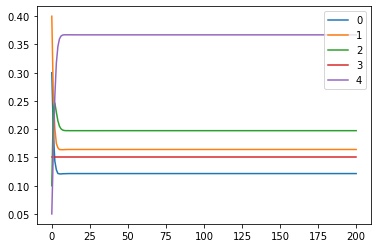

In [3]:
## visualising convergence 
from random import seed
from random import random
stateHist=state
c=state
dfStateHist=pd.DataFrame(state)
distr_hist = [[0,0,0,0,0]]
for x in range(0,200):
  c=np.dot(c,trans_array)
  # print(state)
  stateHist=np.append(stateHist,c,axis=0)
  dfDistrHist = pd.DataFrame(stateHist)
dfDistrHist.plot()
plt.show()

### **INFERENCES FOR PROBLEM 1**
1. P [i]* (P[j] ^ n)
2. Feedback is an isolated state with a self loop ( i.e. it cannot be reached from other states).
  The entire chain is <b>not irreducible</b> as the feedback state cannot be reached from other states. 
3. The initial probabilities of a person going to a particular unit after 1,2,10,100,1000 and 1001 days are shown above.
4. The markov chain has the same probabilities for 100,1000,1001 days.
Hence the markov chain converges

---

After analysing the model Captain holt calls the squad and educates them to ask people to give feedbacks. And the details of the squad are given to the **_Move-o-Tron 99_**. After reanalyising the report the **_Move-o-Tron 99_** gave out a new Matrix, which is shown below

| |Major Crimes|Traffic|General crimes|Feedback|Theft|
|---|---|---|---|---|---|
|Major Crimes|0\.002|0\.666|0\.01|0\.02|0\.302|
|Traffic|0\.466|0\.102|0\.02|0\.032|0\.38|
|General crimes|0\.0|0\.0|1\.0|0\.0|0\.0|
|Feedback|0\.0|0\.0|0\.0|1\.0|0\.0|
|Theft|0\.11|0\.122|0\.066|0\.004|0\.698|

<br>
Considering the new report the model has to be re-evaluated. The initial probablity of a person going to a particular unit on a particular day remains the same.
<br>





## Problem 2 (4 points)


1. Is the chain irreducible? Justify (0.5 point)
2. What will be the intital probability of a person going to a particular unit after 1 day, 2 days, 10 days, 1000 days and 1001 days. (1 point)
 
 Hint: Use the  Chapman−Kolmogorov relationship

3. What can you say about the markov chain from state of intital probability of a person going to a particular unit after 1000 and 1001 days? (0.5 points)


4. Summer Edgecombe is Confidential Informant (CI) to the Officer Kimbal Cho and comes in every day to the police station. If on the first day she goes to the Major crimes Unit what will be the probability that she gives a feedback? (2 points)

    ```python
    # np.delete()
    # https://note.nkmk.me/en/python-numpy-delete/#:~:text=Using%20the%20NumPy%20function%20np,from%20the%20NumPy%20array%20ndarray%20.&text=Specify%20the%20axis%20(dimension)%20and,a%20slice%20or%20a%20list.

    print(a)
    # [[ 0  1  2  3]
    #  [ 4  5  6  7]
    #  [ 8  9 10 11]]

    print(np.delete(a, 1, 0))
    # [[ 0  1  2  3]
    #  [ 8  9 10 11]]

    print(np.delete(a, 1, 1))
    # [[ 0  2  3]
    #  [ 4  6  7]
    #  [ 8 10 11]]

    # Deleting multiple rows or columns
    print(np.delete(a, [0, 3], 1))
    # [[ 1  2]
    #  [ 5  6]
    #  [ 9 10]]

    # Deleting rows and columns
    print(np.delete(np.delete(a, 1, 0), 1, 1))
    # [[ 0  2  3]
    #  [ 8 10 11]]

    # matrix multiplication or cross pdt C = A*B
    matrix_C = matrix_A @ matrix_B # matrix_C = np.matmul(matrix_A, matrix_B)

    ```

In [4]:
# encoding the probabilities as a numpy array
trans_array = np.array([
    [0.002, 0.666, 0.01, 0.020, 0.302],
    [0.466, 0.102, 0.02, 0.032, 0.38],
    [0.0, 0.0, 1, 0.0, 0.0],
    [0, 0, 0, 1, 0],
    [0.11, 0.122, 0.066, 0.004, 0.698]
])

# ensures that the probabilities sum to 1
assert(trans_array[0].sum() == 1.0)
assert(trans_array[1].sum() == 1.0)
assert(trans_array[2].sum() == 1.0)
assert(trans_array[3].sum() == 1.0)
assert(trans_array[4].sum() == 1.0)

# encoding the initial probability of as a numpy array
state = np.array([[0.3, 0.4, 0.1, 0.15, 0.05]])
assert(state[0].sum() == 1.0)

matrix_C = state
for _ in range(1):
    matrix_C = np.dot(matrix_C, trans_array)

print("intital probability of a person going to a particular unit after 1 day: ", matrix_C)

matrix_C = state
for _ in range(2):
    matrix_C = np.dot(matrix_C, trans_array)

print("intital probability of a person going to a particular unit after 2 day: ", matrix_C)

matrix_C = state
for _ in range(10):
    matrix_C = np.dot(matrix_C, trans_array)

print("intital probability of a person going to a particular unit after 10 day: ", matrix_C)

matrix_C = state
for _ in range(100):
    matrix_C = np.dot(matrix_C, trans_array)

print("intital probability of a person going to a particular unit after 100 day: ", matrix_C)

matrix_C = state
for _ in range(1000):
    matrix_C = np.dot(matrix_C, trans_array)

print("intital probability of a person going to a particular unit after 1000 day: ", matrix_C)


matrix_C = state
for _ in range(1001):
    matrix_C = np.dot(matrix_C, trans_array)

print("intital probability of a person going to a particular unit after 1001 day: ", matrix_C)




intital probability of a person going to a particular unit after 1 day:  [[0.1925 0.2467 0.1143 0.169  0.2775]]
intital probability of a person going to a particular unit after 2 day:  [[0.1458722 0.1872234 0.139474  0.1818544 0.345576 ]]
intital probability of a person going to a particular unit after 10 day:  [[0.07693332 0.09688565 0.3362719  0.24330485 0.24660428]]
intital probability of a person going to a particular unit after 100 day:  [[3.37699477e-04 4.25255374e-04 6.59171611e-01 3.38982813e-01
  1.08262174e-03]]
intital probability of a person going to a particular unit after 1000 day:  [[8.97378472e-28 1.13004326e-27 6.60595331e-01 3.39404669e-01
  2.87688168e-27]]
intital probability of a person going to a particular unit after 1001 day:  [[8.44851901e-28 1.06389804e-27 6.60595331e-01 3.39404669e-01
  2.70848815e-27]]


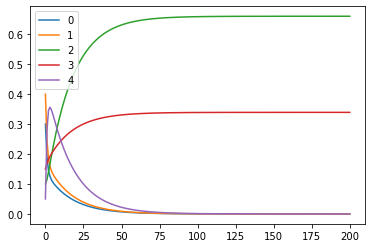

In [5]:
## visualising convergence 
from random import seed
from random import random
stateHist=state
c=state
dfStateHist=pd.DataFrame(state)
distr_hist = [[0,0,0,0,0]]
for x in range(0,200):
  c=np.dot(c,trans_array)
  # print(state)
  stateHist=np.append(stateHist,c,axis=0)
  dfDistrHist = pd.DataFrame(stateHist)
dfDistrHist.plot()
plt.show()

### **INFERENCES FOR PROBLEM 2**
1. General crime and feedback are absorbing states because The sequence gets trapped once it reached this state as it cannot come out of it. The chain is  <b> not irreducible</b> because at n = 1000 and n =1001, the state probability <b>do not converge </b>( they have a small difference, though small they are not equal) 
2. The initial probabilities of a person going to a particular unit after 1,2,10,100,1000 and 1001 days are shown above. 
3. as we can see from the above results there is a very small difference in the state probabilities as we move from n=1000 to n=1001 i.e. state probabilities do not converge till 1001 days.
4. The question confirms that Summer Edgecombe goes to major crimes , we can take P[i] as [1,0,0,0,0]. n = 1 as it is the first day and P[i,j] ( major crimes -> feedback) = 0.02 from the state transition diagram.
Hence the <b>probability of her giving feedback</b> on the first day after going to major crimes unit would be (1)*(0.02)^1 = <b>0.02 </b>



##Problem 3 (4 points)

It seems that there is a bug in **_Move-o-Tron 99_** which makes general crimes and feedback units as absorbing states. After updating the software of **_Move-o-Tron 99_**, Captain Holt wants to find out the effect that Amy Santiago has on the probability of a person giving feedback. So one matrix is generated including Santiago and the other one without. 

Matrix 1 (With Santiago)

| |Major Crimes|Traffic|General crimes|Feedback|Theft|
|---|---|---|---|---|---|
|Major Crimes|0\.002|0\.232|0\.31|0\.434|0\.022|
|Traffic|0\.426|0\.102|0\.222|0\.04|0\.21|
|General crimes|0\.03|0\.11|0\.2|0\.294|0\.366|
|Feedback|0\.003|0\.176|0\.321|0\.3|0\.2|
|Theft|0\.11|0\.422|0\.166|0\.1|0\.202|

Matrix 2 (Without Santiago)

| |Major Crimes|Traffic|General crimes|Feedback|Theft|
|---|---|---|---|---|---|
|Major Crimes|0\.11|0\.222|0\.092|0\.374|0\.202|
|Traffic|0\.03|0\.11|0\.2|0\.294|0\.366|
|General crimes|0\.002|0\.232|0\.31|0\.434|0\.022|
|Feedback|0\.466|0\.102|0\.02|0\.032|0\.38|
|Theft|0\.003|0\.176|0\.321|0\.3|0\.2|

<br>

1. How can you find out the effect that Santiago has on the probability of feedback? (1 point)

2. What effect does Santiago have one the probability of getting feedback? (1 point)

    Note: The initial probablity of a person going to a particular unit on a particular day remains the same

3. Name the test Captain Holt is performing. (0.5 points)

Lina Ginetti reports to Captain Holt that the there two kinds of days in the precicnt _"There are normal days and then there are days where workflow is dismal with a tiny dash of pathetic."_. Captain Holt decided to sample the initial probablity of a person going to a particular unit on a good day and a bad day.

4. Without the information about these inital probabilities, can you tell if there is any difference in the probability of getting a feedback? Explain. (1.5 points)



In [6]:
# encoding the probabilities as a numpy array
# With Santiago
trans_array_with_amy = np.array([
    [0.002, 0.232, 0.31, 0.434, 0.022],
    [0.426, 0.102, 0.222, 0.04, 0.21],
    [0.03, 0.11, 0.20, 0.294, 0.366],
    [0.003, 0.176, 0.321, 0.3, 0.2],
    [0.11, 0.422, 0.166, 0.1, 0.202]
])

# Without Santiago
trans_array_without_amy = np.array([
    [0.11, 0.222, 0.092, 0.374, 0.202],
    [0.03, 0.11, 0.20, 0.294, 0.366],
    [0.002, 0.232, 0.31, 0.434, 0.022],
    [0.466, 0.102, 0.02, 0.032, 0.38],
    [0.003, 0.176, 0.321, 0.3, 0.2]
])

# ensures that the probabilities sum to 1
assert(trans_array_with_amy[0].sum() == 1.0)
assert(trans_array_with_amy[1].sum() == 1.0)
assert(trans_array_with_amy[2].sum() == 1.0)
assert(trans_array_with_amy[3].sum() == 1.0)
assert(trans_array_with_amy[4].sum() == 1.0)

assert(trans_array_without_amy[0].sum() == 1.0)
assert(trans_array_without_amy[1].sum() == 1.0)
assert(trans_array_without_amy[2].sum() == 1.0)
assert(trans_array_without_amy[3].sum() == 1.0)
assert(trans_array_without_amy[4].sum() == 1.0)

# encoding the initial probability of as a numpy array
state = np.array([[0.3, 0.4, 0.1, 0.15, 0.05]])
assert(state[0].sum() == 1.0)


**trans_array_with_amy**

In [7]:
matrix_C = state
for _ in range(1):
    matrix_C = np.dot(matrix_C, trans_array_with_amy)

print("intital probability of a person going to a particular unit after 1 day: ", matrix_C)

matrix_C = state
for _ in range(2):
    matrix_C = np.dot(matrix_C, trans_array_with_amy)

print("intital probability of a person going to a particular unit after 2 day: ", matrix_C)

matrix_C = state
for _ in range(10):
    matrix_C = np.dot(matrix_C, trans_array_with_amy)

print("intital probability of a person going to a particular unit after 10 day: ", matrix_C)

matrix_C = state
for _ in range(100):
    matrix_C = np.dot(matrix_C, trans_array_with_amy)

print("intital probability of a person going to a particular unit after 100 day: ", matrix_C)

matrix_C = state
for _ in range(1000):
    matrix_C = np.dot(matrix_C, trans_array_with_amy)

print("intital probability of a person going to a particular unit after 1000 day: ", matrix_C)


matrix_C = state
for _ in range(1001):
    matrix_C = np.dot(matrix_C, trans_array_with_amy)

print("intital probability of a person going to a particular unit after 1001 day: ", matrix_C)

intital probability of a person going to a particular unit after 1 day:  [[0.17995 0.1689  0.25825 0.2256  0.1673 ]]
intital probability of a person going to a particular unit after 2 day:  [[0.0991386 0.1976899 0.2451197 0.2451898 0.212862 ]]
intital probability of a person going to a particular unit after 10 day:  [[0.12001985 0.20608065 0.23649948 0.21700298 0.22039704]]
intital probability of a person going to a particular unit after 100 day:  [[0.12001975 0.20607988 0.23649985 0.21700347 0.22039705]]
intital probability of a person going to a particular unit after 1000 day:  [[0.12001975 0.20607988 0.23649985 0.21700347 0.22039705]]
intital probability of a person going to a particular unit after 1001 day:  [[0.12001975 0.20607988 0.23649985 0.21700347 0.22039705]]


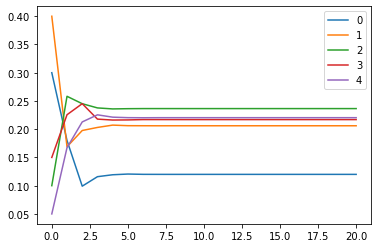

In [8]:
from random import seed
from random import random
stateHist=state
c=state
dfStateHist=pd.DataFrame(state)
distr_hist = [[0,0,0,0,0]]
for x in range(0,20):
  c=np.dot(c,trans_array_with_amy)
  # print(state)
  stateHist=np.append(stateHist,c,axis=0)
  dfDistrHist = pd.DataFrame(stateHist)
dfDistrHist.plot()
plt.show()

**trans_array_without_amy**

In [9]:
matrix_C = state
for _ in range(1):
    matrix_C = np.dot(matrix_C, trans_array_without_amy)

print("intital probability of a person going to a particular unit after 1 day: ", matrix_C)

matrix_C = state
for _ in range(2):
    matrix_C = np.dot(matrix_C, trans_array_without_amy)

print("intital probability of a person going to a particular unit after 2 day: ", matrix_C)

matrix_C = state
for _ in range(10):
    matrix_C = np.dot(matrix_C, trans_array_without_amy)

print("intital probability of a person going to a particular unit after 10 day: ", matrix_C)

matrix_C = state
for _ in range(100):
    matrix_C = np.dot(matrix_C, trans_array_without_amy)

print("intital probability of a person going to a particular unit after 100 day: ", matrix_C)

matrix_C = state
for _ in range(1000):
    matrix_C = np.dot(matrix_C, trans_array_without_amy)

print("intital probability of a person going to a particular unit after 1000 day: ", matrix_C)


matrix_C = state
for _ in range(1001):
    matrix_C = np.dot(matrix_C, trans_array_without_amy)

print("intital probability of a person going to a particular unit after 1001 day: ", matrix_C)

intital probability of a person going to a particular unit after 1 day:  [[0.11525 0.1579  0.15765 0.293   0.2762 ]]
intital probability of a person going to a particular unit after 2 day:  [[0.1550964 0.1580265 0.1855747 0.2501822 0.2511202]]
intital probability of a person going to a particular unit after 10 day:  [[0.14495315 0.16283309 0.18658633 0.26399883 0.2416286 ]]
intital probability of a person going to a particular unit after 100 day:  [[0.14495178 0.16283362 0.18658671 0.26400004 0.24162786]]
intital probability of a person going to a particular unit after 1000 day:  [[0.14495178 0.16283362 0.18658671 0.26400004 0.24162786]]
intital probability of a person going to a particular unit after 1001 day:  [[0.14495178 0.16283362 0.18658671 0.26400004 0.24162786]]


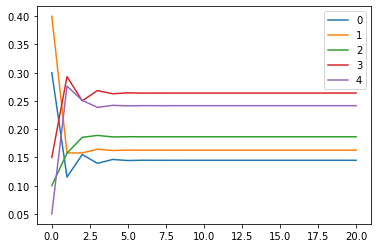

In [10]:
stateHist=state
c=state
dfStateHist=pd.DataFrame(state)
distr_hist = [[0,0,0,0,0]]
for x in range(0,20):
  c=np.dot(c,trans_array_without_amy)
  # print(state)
  stateHist=np.append(stateHist,c,axis=0)
  dfDistrHist = pd.DataFrame(stateHist)
dfDistrHist.plot()
plt.show()

### **INFERENCES FOR PROBLEM 3**
1. We can perform <b>AB testing</b> to find out the effect that Santiago has on the probability of feedback.<br/> From the two stationary distributions, the one with amy becomes stationary for n=7 whereas the stationary distribution for without amy becomes stationary at n=5.

2. We can see that probability of going to the feedback unit for the transition matrix **with amy** is:<br/>
after 1000 days: 0.21700347<br/>
after 1001 days: 0.21700347<br/>

  We can see that probability of going to the feedback unit for the transition matrix **without amy** is:<br/>
  after 1000 days: 0.26400004<br/>
  after 1001 days: 0.26400004<br/>

  The probability of going to the feedback unit for transition matrix **without amy** is higher by 0.04699657 (4.6%). This implies Amy Santiago has a rather adverse effect on the probability of getting feedback, because in amy's absence the probability of going to the feedback unit is higher by 4.6%. Maybe amy makes people feel cautious around her?

3. AB testing. <br/>
Comparing transition probabilities in the long run with and without 
a factor constitutes the AB testing for Markov Chains

4.  The stationary distribution, if exists, is independant of the initial distribution. So even without information of inital state probabilities, we can get the stationary distribution.<br/>
if pi = (pi 1, pi 2, pi 3.. pi m) is the stationary distribution,
then <br/>
pi = pi*P <br/>
where P is a 1 step transition matrix.<br/>
and i=1 to m (m=5 states here)<br/>
As we can see the initial state is not needed to compute the stationary distribution. So there is no difference in the probability of getting a feedback not knowing initial state.
